In [1]:
from pylab import *
%matplotlib inline

In [5]:
def rk4_a(ec,p_ini,x,args=0,h=0.001):
    if (x[1]-x[0]) <= 5.*h:
        h = (x[1]-x[0])/10
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i])
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
            sol[i+1,:] = sol[i,:] + (h/6.)*(k1+2*k2+2*k3+k4)
    else:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i],args)
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h,args)
            sol[i+1,:] = sol[i,:] + (h/6.)*(k1+2*k2+2*k3+k4)

    return tiempos,sol

In [13]:
def mov(x_v,t,a_b_g):

    rpa = sqrt(x_v[0]**2 + (x_v[1]-a_b_g[0])**2)
    rpb = sqrt(x_v[0]**2 + (x_v[1]-a_b_g[1])**2)
    
    dxp,dyp = x_v[2],x_v[3]
    dvxp = a_b_g[2]*x_v[0]/(rpa**3) + a_b_g[2]*x_v[0]/(rpb**3)
    dvyp = a_b_g[2]*(x_v[1]-a_b_g[0])/(rpa**3) + a_b_g[2]*(x_v[1]-a_b_g[1])/(rpb**3)
    
    return array([dxp,dyp,dvxp,dvyp])
    

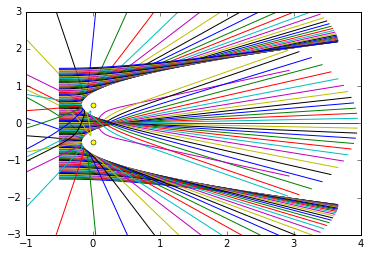

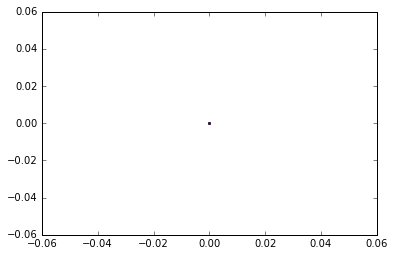

In [142]:
particulas = 120
a_b_g = [0.5,-0.5,0.5]
med = 4
err = 5e-1
graph = zeros(particulas)
for i in arange(particulas):
    p_ini = [-0.5,0.025*i - 1.5,4,0]
    t,r = rk4_a(mov,p_ini,[0,1],a_b_g)
    
    
    plot(r[:,0],r[:,1])
plot([0],[a_b[0]],'o',color='yellow',markersize=5)
plot([0],[a_b[1]],'o',color='yellow',markersize=5)
xlim(-1,4)
ylim(-3,3)
show()

for m in arange(len(graph)):
    plot([0],graph[m],'.',markersize=3)

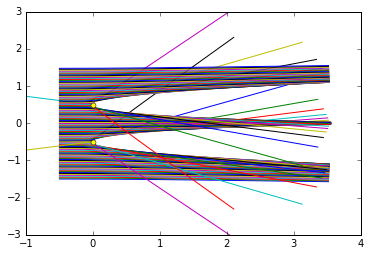

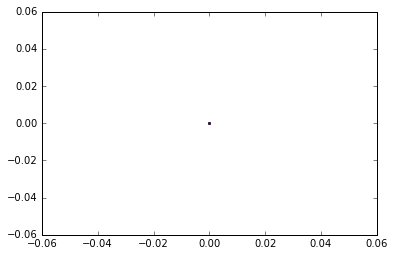

In [6]:
particulas = 120
a_b = [0.5,-0.5,0.2]
med = 4
err = 5e-1
graph = zeros(particulas)

for i in arange(particulas):
    p_ini = [-0.5,0.025*i - 1.5,4,0]
    t,r = rk4_a(mov,p_ini,[0,1],a_b)
    
    
    plot(r[:,0],r[:,1])
plot([0],[a_b[0]],'o',color='yellow',markersize=5)
plot([0],[a_b[1]],'o',color='yellow',markersize=5)
xlim(-1,4)
ylim(-3,3)
show()

for m in arange(len(graph)):
    plot([0],graph[m],'.',markersize=3)

In [184]:
def rutherford(p,a_b_g,N,pantalla):
    trayectoria = zeros((N,len(p)))
    trayectoria[0,:] = p
    mi_dt = .005
    n = 0
    
    for i in range(N-1):
        t,sol_dt = rk4_a(mov,trayectoria[i,:],[0,mi_dt],a_b_g)
        if sol_dt[-1,0] > pantalla:
            dt_busqueda = mi_dt/2
            y_izq = trayectoria[i,:]
            t,sol = rk4_a(mov,trayectoria[i,:],[0,dt_busqueda],a_b_g)
            y_med = sol[-1,:]
            while abs(y_izq[0] - pantalla) > 1e-1:
                if (y_med-pantalla)*(y_izq-pantalla) < 0:
                    reinicio = y_izq
                else:
                    reinicio = y_med
                dt_busqueda = dt_busqueda/2
                t,sol = rk4_a(mov,reinicio,[0,dt_busqueda],a_b_g)
                y_izq = reinicio
                y_med = sol[-1,:]
            break
                
        else:
            trayectoria[i+1,:] = sol_dt[-1,:]
            n += 1 
    
    menos = N-n
    trayectoria = trayectoria[1:-menos]
    
    
    return trayectoria
        

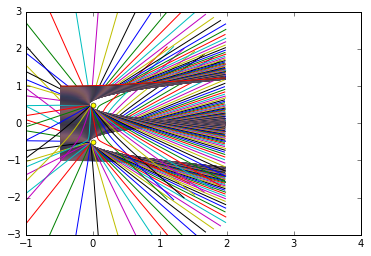

(-1, 1)

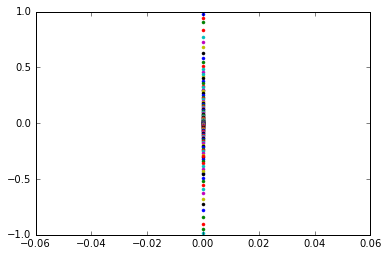

In [204]:
a_b_g = [0.5,-0.5,0.5]
particulas = 500
graph = zeros(particulas)

for i in range(particulas):
    p_ini = [-0.5,((2./particulas)*i)-1,4,0]
    trayectoria = rutherford(p_ini,a_b_g,170,2)
    plot(trayectoria[:,0],trayectoria[:,1])
    graph[i] = trayectoria[-1,1]

plot([0],[a_b_g[0]],'o',color='yellow',markersize=5)
plot([0],[a_b_g[1]],'o',color='yellow',markersize=5)
xlim(-1,4)
ylim(-3,3)
show()

for j in range(particulas):
    plot([0],graph[j],'.')
ylim(-1,1)

for k in range(particulas):
    x = xrange(particulas)

In [154]:
a_b_g = [0.5,-0.5,0.5]
particulas = 80


p_ini = [-0.5,((4./particulas)*57)-2,4,0]
trayectoria = rutherford(p_ini,a_b_g,130,2)

print trayectoria

ValueError: could not broadcast input array from shape (503) into shape (130)

In [172]:
a = zeros((6,4))
a = a[1:-2]
print a

[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


In [209]:
a = linspace(-1,1)
print a

[-1.         -0.95918367 -0.91836735 -0.87755102 -0.83673469 -0.79591837
 -0.75510204 -0.71428571 -0.67346939 -0.63265306 -0.59183673 -0.55102041
 -0.51020408 -0.46938776 -0.42857143 -0.3877551  -0.34693878 -0.30612245
 -0.26530612 -0.2244898  -0.18367347 -0.14285714 -0.10204082 -0.06122449
 -0.02040816  0.02040816  0.06122449  0.10204082  0.14285714  0.18367347
  0.2244898   0.26530612  0.30612245  0.34693878  0.3877551   0.42857143
  0.46938776  0.51020408  0.55102041  0.59183673  0.63265306  0.67346939
  0.71428571  0.75510204  0.79591837  0.83673469  0.87755102  0.91836735
  0.95918367  1.        ]
